In [1]:
# Libraries for deep learming and cqmputer vision
import torch
import torchvision
import torchvision.transforms as transforms

# Libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
# For convolutional neural network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170M/170M [00:36<00:00, 4.65MB/s] 


In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

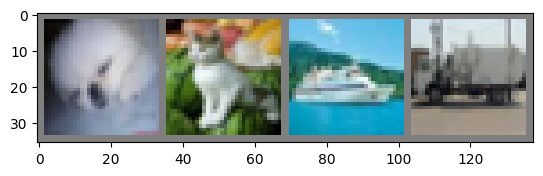

dog   cat   ship  truck


In [10]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [18]:
# Define a Convolutional Neural Network without dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        features = x.view(-1, 16 * 5 * 5)
        x = self.fc1(features)
        x = self.relu3(x)
        x2 = self.fc2(x)
        x = self.relu4(x2)
        x = self.fc3(x)
        return (features, x2, x)
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
use_gpu = torch.cuda.is_available()
print("GPU Available: ", use_gpu)
if use_gpu:
    net.cuda()

GPU Available:  False


In [20]:
# define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
# train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        features, x2, outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch %d, Mini-batch %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[Epoch 1, Mini-batch  2000] loss: 2.197
[Epoch 1, Mini-batch  4000] loss: 1.800
[Epoch 1, Mini-batch  6000] loss: 1.638
[Epoch 1, Mini-batch  8000] loss: 1.562
[Epoch 1, Mini-batch 10000] loss: 1.497
[Epoch 1, Mini-batch 12000] loss: 1.449
[Epoch 2, Mini-batch  2000] loss: 1.385
[Epoch 2, Mini-batch  4000] loss: 1.328
[Epoch 2, Mini-batch  6000] loss: 1.313
[Epoch 2, Mini-batch  8000] loss: 1.295
[Epoch 2, Mini-batch 10000] loss: 1.299
[Epoch 2, Mini-batch 12000] loss: 1.270
Finished Training


In [22]:
# Saving the trained model
torch.save(net.state_dict(), './cifar_net.pth')

In [23]:
#loading the trained model
net = Net() 
net.load_state_dict(torch.load('./cifar_net.pth'))

<All keys matched successfully>

In [25]:
net.eval()  # Set the model to evaluation mode


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
dataiter = iter(testloader)
images, labels = next(dataiter)
if use_gpu:
	images, labels = images.cuda(), labels.cuda()

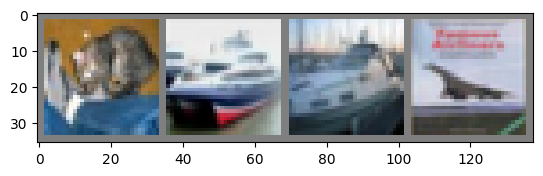

GroundTruth:  cat   ship  ship  plane


In [28]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [30]:
if use_gpu:
	images = images.to('cuda')
_, _, outputs = net(images)

In [31]:
_, predicted = torch.max(outputs.data, 1)
predicted = predicted.cpu().numpy()
className = list(classes)
print('Predicted: ', ' '.join('%5s' % className[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if use_gpu:
            images, labels = images.cuda(), labels.cuda()
        _, _, outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()   
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [33]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if use_gpu:
            images, labels = images.cuda(), labels.cuda()
        _, _, outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 82 %
Accuracy of  bird : 34 %
Accuracy of   cat : 21 %
Accuracy of  deer : 38 %
Accuracy of   dog : 48 %
Accuracy of  frog : 72 %
Accuracy of horse : 70 %
Accuracy of  ship : 61 %
Accuracy of truck : 44 %


In [34]:
for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # wrap them in Variable
    if use_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    else:
        inputs, labels = inputs, labels

    # extracting features
    _, features, _ = net(inputs)

    if use_gpu:
        features = features.cpu()
        labels = labels.cpu()
    feature = features.data.numpy()
    label = labels.data.numpy()
    label = np.reshape(label,(labels.size(0),1))

    if i==0:
        featureMatrix = np.copy(feature)
        labelVector = np.copy(label)
    else:
        featureMatrix = np.vstack([featureMatrix,feature])
        labelVector = np.vstack([labelVector,label])

print('Finished Feature Extraction for Train Set')

Finished Feature Extraction for Train Set


In [35]:
for i, data in enumerate(testloader, 0):
    # get the inputs
    inputs, labels = data

    # wrap them in Variable
    if use_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    else:
        inputs, labels = inputs, labels

    # extracting features
    _, features, _ = net(inputs)

    if use_gpu:
        features = features.cpu()
        labels = labels.cpu()
    feature = features.data.numpy()
    label = labels.data.numpy()
    label = np.reshape(label,(labels.size(0),1))

    if i==0:
        featureMatrixTest = np.copy(feature)
        labelVectorTest = np.copy(label)
    else:
        featureMatrixTest = np.vstack([featureMatrixTest,feature])
        labelVectorTest = np.vstack([labelVectorTest,label])

In [36]:
print('Finished Feature Extraction for Test Set')

Finished Feature Extraction for Test Set


In [37]:
# Classification using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import joblib

In [38]:
# define the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [43]:
# test with random forest for test set of CIFAR-10 dataset
clf.fit(featureMatrix, labelVector.ravel())
labelVectorPredicted = clf.predict(featureMatrixTest)
print(classification_report(labelVectorTest, labelVectorPredicted))
print(confusion_matrix(labelVectorTest, labelVectorPredicted))


              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1000
           1       0.67      0.71      0.69      1000
           2       0.47      0.42      0.44      1000
           3       0.38      0.40      0.39      1000
           4       0.49      0.46      0.48      1000
           5       0.46      0.42      0.44      1000
           6       0.60      0.69      0.64      1000
           7       0.66      0.64      0.65      1000
           8       0.68      0.71      0.70      1000
           9       0.66      0.64      0.65      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000

[[636  36  68  20  27  10  17  15 133  38]
 [ 29 713   2  20   8   9  17  13  55 134]
 [ 71  14 423  95 133  93  93  37  25  16]
 [ 34  15  80 402  77 189 104  43  24  32]
 [ 39  13 124  77 463  45 111 100  21   7]
 [ 14  13  90 236  61 416 